In [145]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Homework 3

Due 12/10 10am. No submissions will be accepted after 12/13 9am.

In this  homework you will create CNN models of the CIFAR-10 and CIFAR-100 datasets which are available as PyTorch and Tensorflow datasets. Info about these datasets can be found at https://www.cs.toronto.edu/~kriz/cifar.html

All parts must be able to run on Google colab using GPUs.

**All work must be your own work.** If you copy something from the internet, include the link.

Make sure all the output is shown.

Name your submission your_rcsid_HW3.ipynb

There are three parts to the assignment:

1) Tensorflow Model (40 pts)  
2) Pytorch Model (40 pts)  
3) Pretrained Mode (20 pts)  

Points for each part are in () after the part number.

### 1. Tensorflow Model

#### 1.1(1) Tensorflow imports

Display Version

In [147]:
# Your Code Here
import tensorflow as tf

tf.__version__



'2.7.0'

#### 1.2(2) Load the CIFAR10 data into Training and Test sets. Display the shapes.

In [148]:
# Your Code Here
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

#### 1.3(2) Data Preprocessing
Reshape each image to a 4-d array, convert to floating point and scale.

Display 5 training values and 5 test values

In [149]:
# Your Code Here

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train[16:22], X_test[16:22] 

(array([[[[0.92156863, 0.9254902 , 0.93333334],
          [0.92156863, 0.9254902 , 0.93333334],
          [0.92941177, 0.93333334, 0.9411765 ],
          ...,
          [0.9137255 , 0.91764706, 0.9254902 ],
          [0.8901961 , 0.9019608 , 0.9137255 ],
          [0.8745098 , 0.89411765, 0.9098039 ]],
 
         [[0.90588236, 0.9098039 , 0.91764706],
          [0.9098039 , 0.9137255 , 0.92156863],
          [0.91764706, 0.92156863, 0.92941177],
          ...,
          [0.90588236, 0.9098039 , 0.91764706],
          [0.88235295, 0.89411765, 0.9098039 ],
          [0.8666667 , 0.88235295, 0.9137255 ]],
 
         [[0.90588236, 0.9098039 , 0.91764706],
          [0.9137255 , 0.91764706, 0.9254902 ],
          [0.92941177, 0.93333334, 0.9411765 ],
          ...,
          [0.9098039 , 0.9137255 , 0.92156863],
          [0.88235295, 0.89411765, 0.9098039 ],
          [0.8666667 , 0.8862745 , 0.9137255 ]],
 
         ...,
 
         [[0.49019608, 0.4862745 , 0.47843137],
          [0.49411

#### 1.4(2) Encode the dependent variable. 

Display the shapes.

In [150]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_train_one_hot.shape, y_test_one_hot.shape

((50000, 10), (10000, 10))

#### 1.5(2) Split training data into training data and validation data. 

Use 20% of the data for validation. Display the shapes.


In [151]:
# Your Code Here
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

#### 1.6 (15) Specify model structure

Create a Tensorflow model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 1.13.

In [152]:
# Your Code Here

from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),
                     padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))


#### 1.7(2) Output a model summary.

In [153]:
# Your Code Here
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

#### 1.8(2) Compile Model with Adam optimizer

Use appropriate loss function and use 'accuracy' as metric.

In [154]:
# Your Code Here

model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#### 1.9(2) Train the model with training and validation data.

Experiment with different batch sizes. Summarize your results in 1.13.

In [155]:
# Your Code Here
batch_size = 64 #128,256 # Minibatch size
epochs = 10
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
                        validation_data=(valid_X, valid_label))

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 1.4291 - accuracy: 0.4829 - val_loss: 1.1172 - val_accuracy: 0.5956
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.9890 - accuracy: 0.6543 - val_loss: 0.9186 - val_accuracy: 0.6758
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.8026 - accuracy: 0.7211 - val_loss: 0.8255 - val_accuracy: 0.7135
Epoch 4/10
625/625 [==============================] - 10s 16ms/step - loss: 0.6777 - accuracy: 0.7610 - val_loss: 0.8394 - val_accuracy: 0.7084
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.5619 - accuracy: 0.8026 - val_loss: 0.7734 - val_accuracy: 0.7403
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.4626 - accuracy: 0.8374 - val_loss: 0.7846 - val_accuracy: 0.7433
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 0.3735 - accuracy: 0.8684 - val_loss: 0.8652 - val_accuracy:

#### 1.10(1) Plot the training and validation loss

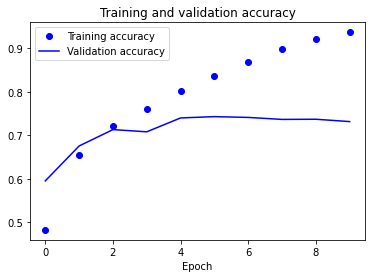

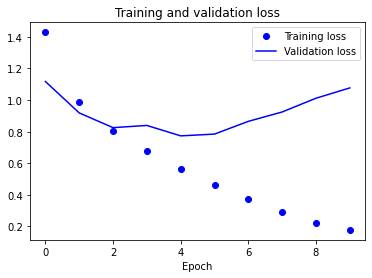

In [156]:
# Your Code Here

accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epoch")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

#### 1.11(2) Evaluate model on the test set

Display test loss and accuracy

In [157]:
# Your Code Here
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 1.113774299621582
Test accuracy: 0.7232000231742859


#### 1.12(2) Predict the classes of the test data

Display Confusion Matrix and accuracy.

In [158]:
# Your Code Here

predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
cm = confusion_matrix(predicted_classes,y_test)
print(cm)

print(f'Accuracy: {np.trace(cm)/np.sum(cm)}')

[[799  38 128 109  95  65  77  47  94  52]
 [  7 797   4   2   2   0   6   2  10  49]
 [ 59   8 581  42  65  25  28  18  18   4]
 [ 16  15  49 519  77 119  57  40  21  13]
 [  9   0  63  31 619  30  46  33   7   4]
 [  7  12  86 207  55 714  54  81   5  17]
 [ 10   3  36  35  21   8 711   5   3   2]
 [ 10   7  34  33  57  34   8 761   9  15]
 [ 34  18   8   5   6   0   7   3 798  14]
 [ 49 102  11  17   3   5   6  10  35 830]]
Accuracy: 0.7129


#### 1.13(5) Your summary of the experiments you conducted

### 2. PyTorch Model

In [159]:
def conv_image_size(layers,size_in,padding=0,kernel=3,stride=2,dilation=1):
    for _ in range(layers):
        size_in = np.floor(((size_in+2*padding - dilation*(kernel-1)-1)/stride)+1)
    return int(size_in)


####  Install pytorch-model-summary if not installed. It is not installed in colab.

In [160]:
!pip install pytorch-model-summary


#### 2.1(1) PyTorch imports

Display PyTorch Version

In [161]:
# Your Code Here

import torch
torch.__version__

'1.10.0+cu111'

#### 2.2(1) Set PyTorch device

Display the device

In [162]:
# Your Code Here
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 2.3 (2) Load the CIFAR100 Training and Test datasets as tensors

Display the data shape

In [163]:
# Your Code Here
import torchvision
import torchvision.transforms as transforms


trainset = torchvision.datasets.CIFAR100(root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

testset = torchvision.datasets.CIFAR100(root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)

trainset.data.shape, testset.data.shape

Files already downloaded and verified
Files already downloaded and verified


((50000, 32, 32, 3), (50000, 32, 32, 3))

#### 2.4 (10) Define and instantiate the model

Create a PyTorch model. Experiment with different layer structures to optimize classification performance.

Keep your best one here. Summarize your results in question 2.11.


In [164]:
# Your Code Here
import torch.nn as nn
inp_sz = conv_image_size(3,32)
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
      nn.ReLU()
    )
    
    self.flatten = nn.Flatten()
    
    self.dense_layers = nn.Sequential(
      nn.Dropout(0.2),
      nn.Linear(128 * inp_sz * inp_sz, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, K)
    )
   
  
  def forward(self, X):
    z = self.conv_layers(X)
    z = self.flatten(z)
    out = self.dense_layers(z) # Softmax done in CrossEntopy Loss
    return out
model = CNN(100).to(device)

#### 2.5(2) Print a summary

In [165]:
# Your Code Here
!pip install pytorch-model-summary
from pytorch_model_summary import summary
print(summary(model,torch.zeros((1,1,32,32)).to(device),show_input=False,show_hierarchical=False))


-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Conv2d-1     [1, 32, 15, 15]             320             320
            ReLU-2     [1, 32, 15, 15]               0               0
          Conv2d-3       [1, 64, 7, 7]          18,496          18,496
            ReLU-4       [1, 64, 7, 7]               0               0
          Conv2d-5      [1, 128, 3, 3]          73,856          73,856
            ReLU-6      [1, 128, 3, 3]               0               0
         Flatten-7           [1, 1152]               0               0
         Dropout-8           [1, 1152]               0               0
          Linear-9            [1, 512]         590,336         590,336
           ReLU-10            [1, 512]               0               0
        Dropout-11            [1, 512]               0               0
         Linear-12            [1, 100]          51,300          51,300
Total

#### 2.6(1) Define Loss and optimizer

In [166]:
# Your Code Here
criterion = nn.CrossEntropyLoss() # Applies the softmax function
optimizer = torch.optim.Adam(model.parameters())


#### 2.7 (2) Create Data loaders

The data loader automatically generates batches in the training loop and takes care of shuffling the data

In [167]:
# Your Code Here

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


### 2.8(5) Train the Model 

Display Epoch, train loss test loss and time of execution of epoch.

In [168]:
# Your Code Here

inp_sz = conv_image_size(3,32)
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    self.conv_layers = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2),
      nn.ReLU(),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
      nn.ReLU()
    )
    
    self.flatten = nn.Flatten()
    
    self.dense_layers = nn.Sequential(
      nn.Dropout(0.2),
      nn.Linear(128 * inp_sz * inp_sz, 512),
      nn.ReLU(),
      nn.Dropout(0.2),
      nn.Linear(512, K)
    )
   
  
  def forward(self, X):
    z = self.conv_layers(X)
    z = self.flatten(z)
    out = self.dense_layers(z) # Softmax done in CrossEntopy Loss
    return out
model = CNN(100).to(device)

def mini_batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs,device):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train() # Set training mode
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to device
      inputs, targets = inputs.to(device), targets.to(device)
     
      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    
    train_loss = np.mean(train_loss) 
    
    test_loss = []
    model.train(False) # Set test model aka model.eval()
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

train_losses, test_losses = mini_batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=50,device=device)


Epoch 1/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:22.199754
Epoch 2/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.675566
Epoch 3/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.769918
Epoch 4/50, Train Loss: 4.6057,       Test Loss: 4.6056, Duration: 0:00:21.759446
Epoch 5/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.501151
Epoch 6/50, Train Loss: 4.6057,       Test Loss: 4.6056, Duration: 0:00:21.785083
Epoch 7/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.644036
Epoch 8/50, Train Loss: 4.6057,       Test Loss: 4.6056, Duration: 0:00:21.618678
Epoch 9/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.915173
Epoch 10/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.669747
Epoch 11/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:22.055029
Epoch 12/50, Train Loss: 4.6056,       Test Loss: 4.6056, Duration: 0:00:21.562385
Epoch 13/50, 

#### 2.9 (1) Plot the train loss and test loss per iteration

In [169]:
# Your Code Here



#### 2.10(10) Predict the Test Data 

Display Confusion Matrix and accuracy.

In [170]:
# Your Code Here



#### 2.11(5) Your summary of the experiments you conducted

### 3.0 Pretrained

#### 3.1 (1) Load a PyTorch pretrained ResNet50 model

In [171]:
# Your Code Here



#### 3.2 (4) Print a summary

In [172]:
# Your Code Here



#### 3.3 (5) Modify model for CIFAR10 dataset. 
Set requires_grad attribute of all the parameters to False

Replace last layer with a Linear Layer with the correct number of inputs and outputs.

Hint: Use summary above and see https://discuss.pytorch.org/t/how-to-modify-the-final-fc-layer-based-on-the-torch-model/766

In [173]:
# Your Code Here



#### 3.4 (2) Send model to device and print summary

In [174]:
# Your Code Here




#### 3.5 (4) Load the CIFAR10 training dataset and retrain the model.

Print the epoch, training loss and time of execution of each epoch.

In [175]:
# Your Code Here



#### 3.6 (1) Plot the Training Loss

In [176]:
# Your Code Here



#### 3.7 (3) Load the test CIFAR10 dataset and predict the Test dataset.

Display the Confusion Matrix and accuracy

In [177]:
# Your Code Here


